In [103]:
import matplotlib.pyplot as plt
import scipy.io as io
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.fftpack import fft
import scipy.io as io
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter

In [104]:

def butter_highpass(cutoff, fs, order):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False, output='ba')
    return b, a

def highpass(data, fs, order,cutoff_high):
    b,a = butter_highpass(cutoff_high,fs, order=order)
    x = lfilter(b,a,data)
    return x


def butter_lowpass(cutoff, fs, order,):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False, output='ba')
    return b, a



def lowpass(data, fs, order, cutoff_low):
    b,a = butter_lowpass(cutoff_low, fs, order=order)
    y = lfilter(b,a,data)
    return y

def bandpass1(data,fs,order,fl,fh):
    hsignal = highpass(data, fs, order,fl)
    lsignal = lowpass(hsignal, fs, order,fh)
    return lsignal




fs = 1000
order = 5

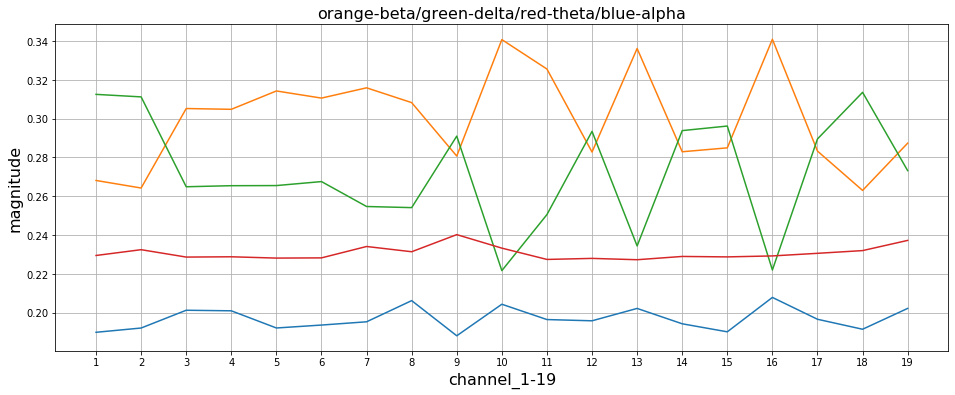

In [130]:
def alpha(y):
    alpha1 = bandpass1(y, fs,order,8.1, 12.0)
    sumalpha1 = sum(abs(alpha1))
    return sumalpha1

def beta(y):
    beta1 = bandpass1(y, fs,order,16.1, 36.0)
    beta1 = sum(abs(beta1))
    return beta1

def gamma(y):
    gamma1 = bandpass1(y, fs,order,36.1, 80.0)
    gamma1 = sum(abs(gamma1))
    return gamma1

def delta(y):
    delta1 = bandpass1(y, fs,order,1.0, 4.0)
    delta1 = sum(abs(delta1))
    return delta1

def sigma(y):
    sigma1 = bandpass1(y, fs,order,12.0, 16.0)
    sigma1 = sum(abs(sigma1))
    return sigma1


def theta(y):
    theta1 = bandpass1(y, fs,order,4.1, 8.0)
    theta1 = sum(abs(theta1))
    return theta1

def maker(y,arr,i):
    a=alpha(y);
    b=beta(y);
    d=delta(y);
    t=theta(y);
    
    #total sum
    tt=a+b+t+d   
    
    p=[a/tt,b/tt,d/tt,t/tt]
    
    
    k=0
    while(k<4):
        arr[k][i]=p[k]
        
        k=k+1
    
    return arr


dat = io.loadmat('Subject1_2D.mat')
x = dat['LeftBackward1']

v=0
arr = [[0]*19,[0]*19,[0]*19,[0]*19]
while(v<19):
    y=x[:,v][:3000]
    y=fft(y)
  
    arr=maker(y,arr,v)
    
    v=v+1

x=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19"]



plt.figure(figsize=(16,6))
plt.grid()
plt.title('orange-beta/green-delta/red-theta/blue-alpha',size=16)
plt.xlabel('channel_1-19',size=16)
plt.ylabel('magnitude',size=16)

i=0
while(i<4):
    k=arr[i]
    
    
    plt.plot(x,k)
    
    i=i+1



